### <a>1.3. Data Decription</a>
#### Files
&gt; #### train.csv
All the values equals to -999 are marked as missing values.
- CAL - Caliper, unit in Inch,  
- CNC - Neutron, unit in dec 
- GR - Gamma Ray, unit in API
- HRD - Deep Resisitivity, unit in Ohm per meter,
- HRM - Medium Resistivity, unit in Ohm per meter,
- PE - Photo-electric Factor, unit in Barn,
- ZDEN - Density, unit in Gram per cubit meter, 
- DTC - Compressional Travel-time, unit in nanosecond per foot,
- DTS - Shear Travel-time, unit in nanosecond per foot,


&gt; #### test.csv
The test data has all features that you used in the train dataset, except the two sonic curves DTC and DTS.

&gt; ####  sample_submission.csv
A valid sample submission.
<p><font style="">
</font></p>

In [1]:
# import libraries
# import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
#import scikit-learn sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
from scipy import stats

## <a>3. Read Data</a>

<a>Top</a>

In [3]:
## importing train data
df = pd.read_csv('train.csv')

In [4]:
df.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


## <a>4. Glimps Data</a>

<a>Top</a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [6]:
df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## <a>5. Exploratory Data Analysis</a>

<a>Top</a>

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, missing values, outliers, anomalies, patterns, or relationships within the data. 

In [7]:
# remove all rows that contains missing value
df.replace(['-999', -999], np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [8]:
df_cleaned=df[(np.abs(stats.zscore(df)) <3).all(axis=1)]

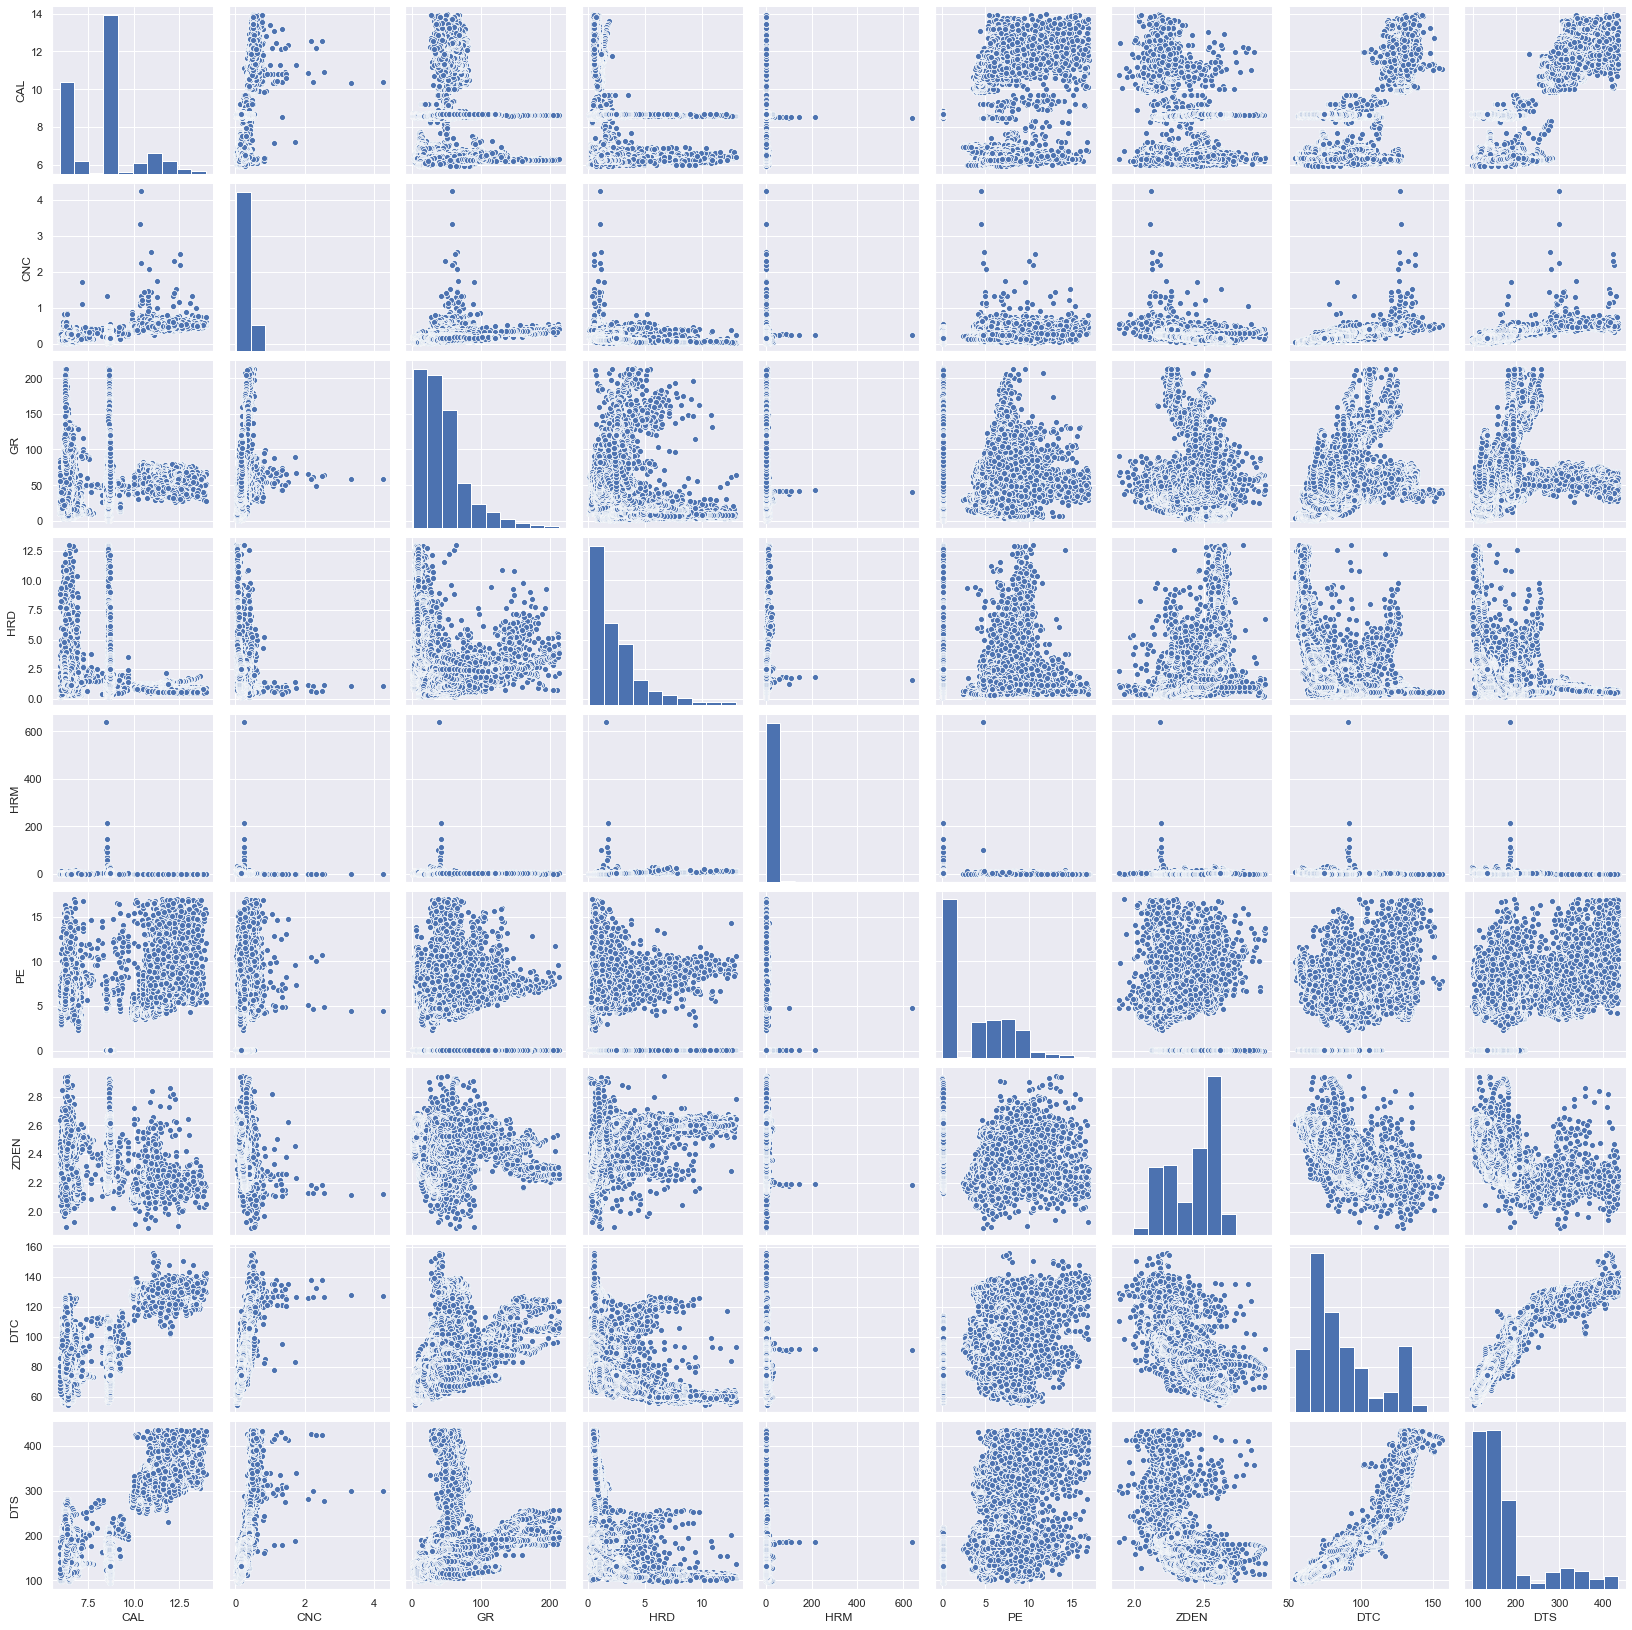

In [9]:
sb.set(style = 'darkgrid') # Set the background to dark

sb.pairplot(df_cleaned) # Create a matrix scatterplot

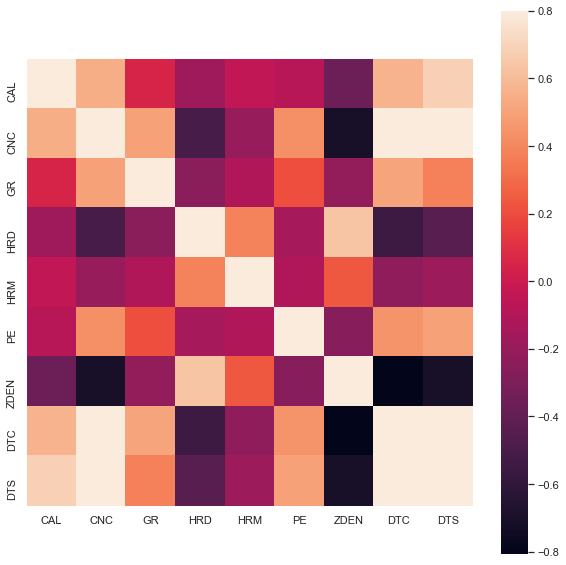

In [10]:
## correlation between the columns
C_mat = df_cleaned.corr()
fig = plt.figure(figsize = (10,10))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

## <a>6. Build Machine Learning Models</a>

<a>Top</a>

In [11]:
# seperate the features and targets
arr = df_cleaned.values
y = arr[:,-2:]
X = arr[:,:-2]

In [12]:
X.shape

(19329, 7)

In [13]:
## scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

### LightGBM : model for DTS

In [14]:
import lightgbm as lgb

In [31]:
%%time
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=15,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,colsample_bytree=0.7,max_depth=6,subsample=0.7,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state=100)
model_lgb.fit(X_train_scaled,y[:,-1]) ##DTS


Wall time: 449 ms


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=6, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=15, objective='regression', random_state=100,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
              subsample_for_bin=200000, subsample_freq=0)

### Random Forest: model for DTC

In [49]:
%%time
model_rf = RandomForestRegressor(n_estimators=100, random_state=100, max_features='sqrt',
                                 max_depth=10,min_samples_leaf=2)
model_rf.fit(X_train_scaled,y[:,-2])


Wall time: 1.81 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [53]:
## feature importance
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_rf).fit(df3_data[:,:-2], df3_data[:,-2])
eli5.show_weights(perm)

Using TensorFlow backend.


Weight,Feature
0.0541 ± 0.0026,x1
0.0032 ± 0.0014,x2
0.0018 ± 0.0004,x4
0.0015 ± 0.0002,x6
0 ± 0.0000,x5
0 ± 0.0000,x0
-0.0093 ± 0.0011,x3


### testing on 20% blind data

In [32]:
df3=pd.read_csv('real_result_20perc.csv')

In [33]:
df3.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,8.6719,0.1199,6.7518,2.8285,3.0391,8.4395,2.5191,67.5481,124.2332
1,8.6719,0.3180,165.4345,1.3170,1.2206,7.1354,2.5517,101.5208,201.2649
2,8.7031,0.3164,58.3146,1.1627,1.8947,8.1722,2.4452,110.8297,250.7232
3,8.6250,0.1527,44.5126,2.5318,3.0052,7.6534,2.5674,80.0383,147.3262
4,8.6250,0.1731,16.1563,13.5082,13.0191,5.1534,2.2164,85.6109,134.4386


In [34]:
# Remove missing 
for col in df3.columns.tolist():
    df3[col][df3[col]==-999] = np.nan
df3.dropna(axis=0, inplace=True)
df3_data = np.array(df3)

In [35]:
df3_data.shape

(2217, 9)

In [36]:
## use same scaler 
x=df3_data[:,0:-2]
x=scaler.transform(x)


In [38]:
def rmse(y_predict, y_real):
        print('Root Mean Square Error is:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))


In [47]:
#3 predicting DTS
y_DTS=model_lgb.predict(x)
rmse(y_DTS, df3_data[:,-1])

Root Mean Square Error is: 23.44274


In [50]:
## predicting DTC
y_DTC=model_rf.predict(x)
rmse(y_DTC, df3_data[:,-2])


Root Mean Square Error is: 4.33227


## Test data

In [40]:
# load test data from well 2
df2 = pd.read_csv('test.csv')
# Remove missing 
for col in df2.columns.tolist():
    df2[col][df2[col]==-999] = np.nan
df2.dropna(axis=0, inplace=True)
df2_data = np.array(df2)

In [41]:
## predicting DTS values
x_blind = df2_data
x_blind= scaler.transform(x_blind)
DTS_result = model_lgb.predict(x_blind)

In [42]:
output_result = pd.DataFrame({'DTS':DTS_result})
output_result.head()

,DTS
0,213.394916
1,216.765784
2,215.702277
3,219.884924
4,225.438975


In [149]:
output_result.to_csv(path_or_buf='./sub_dts.csv', index=False)

In [51]:
## predicting DTC values
DTC_result = model_rf.predict(x_blind)

In [52]:
output_result = pd.DataFrame({'DTC':DTC_result})
output_result.head()

,DTC
0,100.864008
1,102.096979
2,102.395303
3,105.128425
4,104.886402


In [ ]:
output_result.to_csv(path_or_buf='./sub_dtc.csv', index=False)

## <a>8. Summary</a>

<a>Top</a>

1. Compressional sonic data can be more accurately predicted from the given logs than shear sonic values.
2. The sonic logs have a better correlation with caliper, neutron density, gamma ray and photo-electric logs
than others
3. The features that contribute most to the proper prediction of the sonic log values are: neutron density,
gamma ray and medium resistivity (feature ranking using permutation importance)